In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("data/synthetic_grocery_dataset.csv")

In [7]:
df

,Item_ID,Item_Name,Item_Description,Price,Weight (g),Category
0,1,Zucchini,Premium zucchini hand-picked.,15.46,2483,Vegetables
1,2,Muffin,Premium muffin no added sugar.,13.04,2196,Bakery
2,3,Carrot,Organic carrot no added sugar.,5.40,208,Vegetables
3,4,Granola Bar,Imported granola bar hand-picked.,11.04,2328,Snacks
4,5,Orange,Delicious orange packed with nutrients.,3.75,664,Fruits
...,...,...,...,...,...,...
495,496,Garlic,Premium garlic from local farms.,11.77,2599,Vegetables
496,497,Frozen Berries,Delicious frozen berries from local farms.,2.12,2622,Frozen
497,498,Frozen Pizza,Low-fat frozen pizza with natural ingredients.,3.22,2043,Frozen
498,499,Banana,Gluten-free banana no added sugar.,13.46,1920,Fruits


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Manuel\AppData\Local\Temp\ipykernel_34396\1216101316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Category", data=df, palette="Set2")


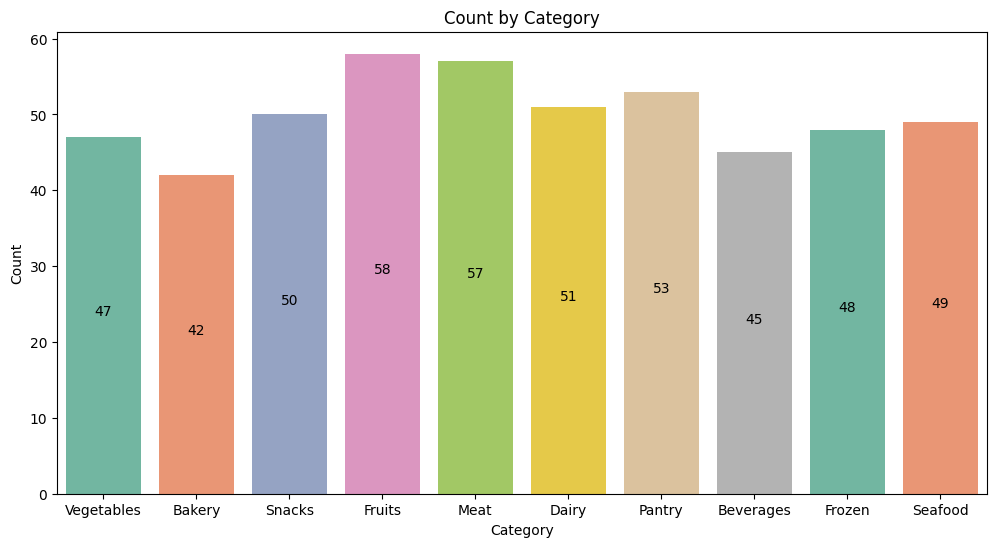

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
# Plot count by category with different color
ax = sns.countplot(x="Category", data=df, palette="Set2")
ax.set_title("Count by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2, '{:1.0f}'.format(height), ha="center")

In [10]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
item_embeddings = model.encode(df["Item_Name"].tolist())

c:\Users\Manuel\.conda\envs\hugging_face_ai_agents_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Manuel\.conda\envs\hugging_face_ai_agents_course\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manuel\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode o

In [12]:
item_embeddings.shape

(500, 384)

In [ ]:
# Reducing dimensionality using t-SNE
from sklearn.manifold import TSNE
item_embeddings_2d = TSNE(n_components=2).fit_transform(item_embeddings)

In [21]:
import hashlib
def map_string_to_color(string: str) -> str:
    return "#" + hashlib.md5(string.encode("utf-8")).hexdigest()[:6]

Text(0, 0.5, 'Principal Component 2')

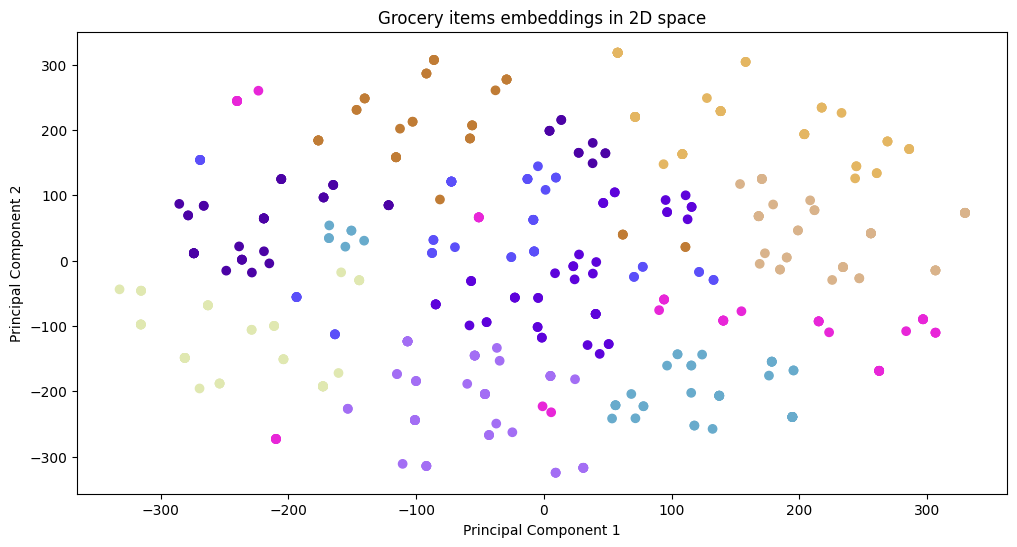

In [ ]:
# Scatter plot of embeddings
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(item_embeddings_2d[:, 0], item_embeddings_2d[:, 1], c=df["Category"].apply(map_string_to_color))
ax.set_title("Grocery items embeddings in 2D space")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")